In [1]:
from monai.apps import DecathlonDataset
from fastMONAI.vision_all import *
import nibabel as nib
from pathlib import Path
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
module_path = str(Path.cwd().parents[0] / "data")
training_data = DecathlonDataset(root_dir=module_path, task="Task05_Prostate", section="training", 
    download=True, cache_num=0, num_workers=3)

2023-04-21 19:42:03,326 - INFO - Verified 'Task05_Prostate.tar', md5: 35138f08b1efaef89d7424d2bcc928db.
2023-04-21 19:42:03,327 - INFO - File exists: c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate.tar, skipped downloading.
2023-04-21 19:42:03,329 - INFO - Non-empty folder exists in c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate, skipped extracting.


In [3]:
df = pd.DataFrame(training_data.data)
df.shape

(26, 2)

In [4]:
df.head()

,image,label
0,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\imagesTr\prostate_46.nii.gz,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_46.nii.gz
1,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\imagesTr\prostate_01.nii.gz,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_01.nii.gz
2,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\imagesTr\prostate_40.nii.gz,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_40.nii.gz
3,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\imagesTr\prostate_24.nii.gz,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_24.nii.gz
4,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\imagesTr\prostate_44.nii.gz,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_44.nii.gz


In [5]:
image = nib.load(df.image[0]).get_fdata()
mask = nib.load(df.label[0]).get_fdata()
print(image.shape, mask.shape)
print(image.dtype, mask.dtype)
image = (image/max(image.flatten()-500)*255).astype(np.uint8)+30#Substraction is to  brighten the image slightly
mask = mask.astype(np.uint8)
print(image.shape, mask.shape)
print(image.dtype, mask.dtype)

(320, 320, 20, 2) (320, 320, 20)
float64 float64
(320, 320, 20, 2) (320, 320, 20)
uint8 uint8


In [6]:
nib.load(df.image[0]).affine

array([[   0.625     ,    0.        ,    0.        ,  -63.32400513],
       [   0.        ,    0.625     ,    0.        , -101.94779968],
       [   0.        ,    0.        ,    3.60000992,  -91.98269653],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [7]:
np.unique(mask)

array([0, 1, 2], dtype=uint8)

In [8]:
image[:,:,0,0].shape

(320, 320)

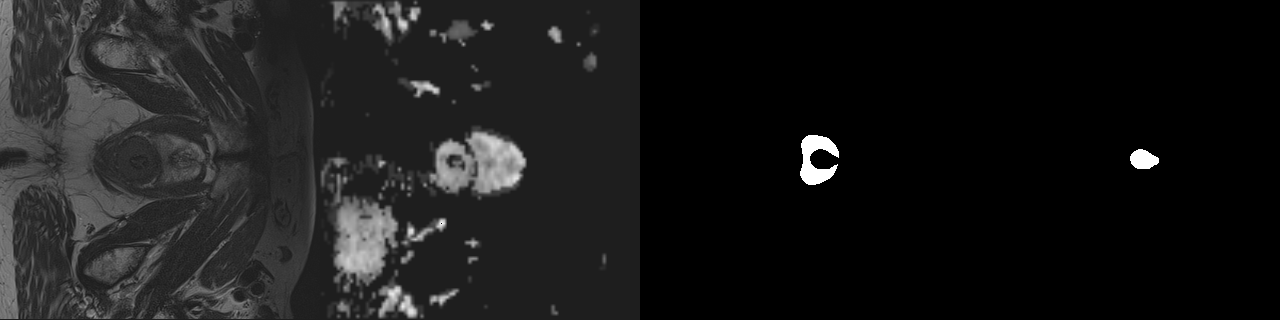

In [9]:
layer = 7
Image.fromarray(np.concatenate((image[:, :, layer, 0], image[:, :, layer, 1], (np.where(mask == 1, 1, 0)*255).astype(np.uint8)[:,:,layer],(np.where(mask == 2, 2, 0)*255).astype(np.uint8)[:,:,layer]), axis=1))

In [10]:
#Plots all different layers in image side by side
def sideBySidePlot(image, mask):
    image = np.flip(np.rot90(image,axes=(1,0), k=3), axis=1)
    mask = np.flip(np.rot90(mask,axes=(1,0), k=3), axis=1)
    image = np.concatenate((image[:, :, :, 0], image[:, :, :, 1]), axis=1)
    mask = np.concatenate(((np.where(mask == 1, 1, 0)*255).astype(np.uint8)[:,:,:],(np.where(mask == 2, 2, 0)*255).astype(np.uint8)[:,:,:]), axis=1)
    combined = np.concatenate((image,mask), axis=0)
    frames = [Image.fromarray(combined[:, :, (combined.shape[2]-i-1)]) for i in range(combined.shape[2])]
    frame_one = frames[0]
    frame_one.save("images/prostate/ProstateSideBySide.gif", format="GIF", append_images=frames,
               save_all=True, duration=200, loop=0)
sideBySidePlot(image, mask)

In [11]:
np.array(mask)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
#Test for class imbalance
mask = [nib.load(file).get_fdata() for file in df.label]
size = np.mean([len(x.flatten()) for x in mask])
ones_count = np.mean([np.count_nonzero(mask == 1) for mask in mask])
twos_count = np.mean([np.count_nonzero(mask == 2) for mask in mask])

print("Size of mask: ", size)
print("Size of mask value 1: ", ones_count)
print("Size of mask value 2: ", twos_count)

Size of mask:  1864782.7692307692
Size of mask value 1:  12335.423076923076
Size of mask value 2:  39194.53846153846


In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((23, 2), (3, 2))

In [14]:
med_dataset = MedDataset(img_list=train_df.label.tolist(), dtype=MedMask, max_workers=12)

In [15]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1,voxel_count_2
0,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_28.nii.gz,384,384,11,0.6042,0.6042,4.0,RAS+,1589653,14398,17965.0
1,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_04.nii.gz,320,320,15,0.6000,0.6000,4.0,RAS+,1460345,10847,64808.0
2,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_39.nii.gz,320,320,15,0.6000,0.6000,4.0,RAS+,1495833,5229,34938.0
3,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_06.nii.gz,320,320,20,0.6250,0.6250,3.6,RAS+,2004713,10730,32557.0
4,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_01.nii.gz,320,320,20,0.6250,0.6250,3.6,RAS+,1997347,12273,38380.0


In [16]:
data_info_df = med_dataset.summary()
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
4,320,320,20,0.625,0.625,3.6,RAS+,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_01.nii.gz,14
3,320,320,15,0.600,0.600,4.0,RAS+,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_04.nii.gz,3
0,256,256,15,0.750,0.750,4.0,RAS+,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_37.nii.gz,1
1,256,256,18,0.750,0.750,3.0,RAS+,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_41.nii.gz,1
2,256,256,18,0.750,0.750,4.0,RAS+,c:\Users\47472\Documents\Skole\Hvl\s6\dat255\courseProject\data\Task05_Prostate\labelsTr\prostate_18.nii.gz,1


In [17]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.625, 0.625, 3.6], False)

In [18]:
bs=4

In [19]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[371.0, 371.0, 24.0]

In [20]:
#Want to reduce size, target area is much smaller than the rest of the image
size = [160.0, 160.0, 32.0]
# size = [320.0, 320.0, 16.0]

In [21]:
item_tfms = [ZNormalization(), PadOrCrop(size), RandomAffine(scales=0, degrees=5)]

In [22]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(valid_pct=0.1, seed=42), # By passing valid_pct=0.1, we tell it to get a random 10% of the training set for validation.
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample)

In [23]:
dls = dblock.dataloaders(train_df, bs=bs)

In [24]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(21, 2)

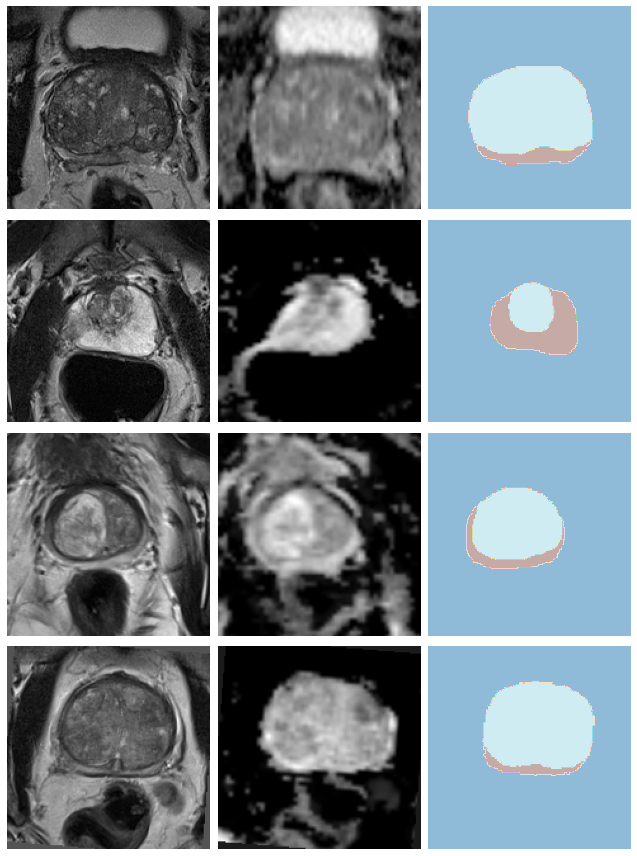

In [25]:
dls.show_batch(anatomical_plane=2)

In [26]:
from monai.networks.nets import UNet
from monai.networks.nets import AttentionUnet
from monai.losses import DiceLoss
from monai.losses import DiceFocalLoss
from monai.losses import TverskyLoss
from monai.losses import DiceCELoss
from torch.nn import BCEWithLogitsLoss

In [27]:
model = UNet(spatial_dims=3, in_channels=2, out_channels=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
# model = AttentionUnet(spatial_dims=3, in_channels=2, out_channels=3, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2))
model = model.model
loss_func = CustomLoss(loss_func=DiceLoss(sigmoid=True))
# loss_func = CustomLoss(loss_func=DiceCELoss(sigmoid=True))
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=[binary_dice_score, multi_dice_score])

In [28]:
# lr = learn.lr_find()
# print(lr)

In [29]:
learn.fit_flat_cos(10 ,0.1)

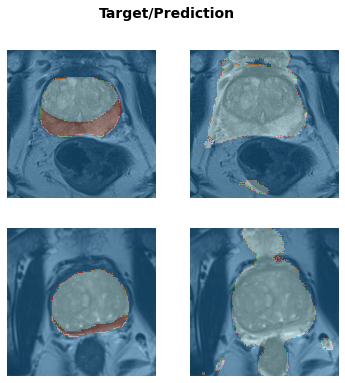

In [31]:
learn.show_results(anatomical_plane=2, ds_idx=1)

In [32]:
test_dl = learn.dls.test_dl(test_df[:],with_labels=True)

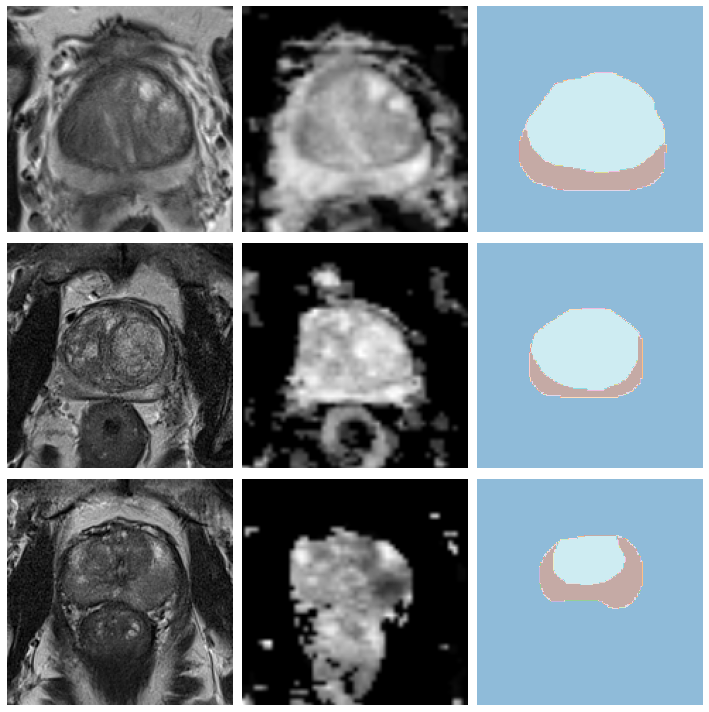

In [33]:
test_dl.show_batch(anatomical_plane=2, figsize=(10,10))

In [34]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([3, 1, 160, 160, 32]), torch.Size([3, 1, 160, 160, 32]))

In [35]:
binary_dice_score(pred_acts, labels)

tensor(0.5916)

In [36]:
np.unique(pred_acts), np.unique(labels)

(array([-11.9836235, -11.912032 , -11.90698  , ...,  82.91757  ,
         83.30068  ,  83.397255 ], dtype=float32),
 array([0., 1., 2.], dtype=float32))

In [37]:
#Test for class imbalance
mask = labels
size = np.mean([len(x.flatten()) for x in mask])
ones_count = np.mean([np.count_nonzero(mask == 1) for mask in mask])
twos_count = np.mean([np.count_nonzero(mask == 2) for mask in mask])

print("Size of mask: ", size)
print("Size of mask value 1: ", ones_count)
print("Size of mask value 2: ", twos_count)

Size of mask:  819200.0
Size of mask value 1:  11517.666666666666
Size of mask value 2:  36114.333333333336


<Figure size 1440x1440 with 0 Axes>

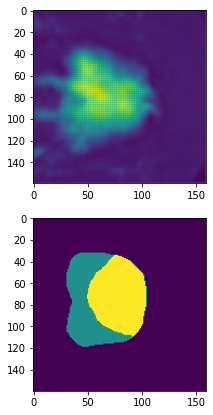

In [38]:
x = pred_acts[0][0]
y = labels[0][0]
plt.figure(figsize=(20,20))
f, axarr = plt.subplots(2, figsize=(7, 7))
axarr[0].imshow(x[:,:,10])
axarr[1].imshow(y[:,:,10])